# Analysis of the scrapped content

### Installing packages

!pip install spacy

nltk.download('punkt')

nltk.download('wordnet')

!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

!pip install --upgrade "ibm-watson>=5.1.0"

!pip install chromedriver-autoinstaller

!pip install selenium

!pip install python-dotenv

### Downloading the dataset from online

from Scweet.scweet import scrap
from Scweet.user import get_user_information, get_users_following, get_users_followers
data = scrap(words=['Fitbit Sense'], start_date="2021-01-01", max_date="2021-06-01", from_account = None,interval=1, 
      headless=True, display_type="Top", save_images=False, 
             resume=False, filter_replies=True, proximity=True)
data.head()

### Importing packages

In [1]:
import nltk
import json
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

### Error in spacy.load('en_core_web_sm')

Could not read config.cfg from C:\Users\arpit\Anaconda3\lib\site-packages\en_core_web_sm\en_core_web_sm-2.2.0\config.cfg

### Solution: Open Anaconda prompt and type the line given below

python -m spacy download en_core_web_sm

In [2]:
nlp = spacy.load('en_core_web_sm')

Reading Scrapped Data from the file

### Reading CSV file

In [3]:
#pd.set_option('display.max_rows',None)

In [4]:
df=pd.read_csv('New_Fitbit.csv')

In [5]:
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Sandra Lafuente,@sandritalaf,2021-01-01T22:19:32.000Z,2021 Sin excusas#FitbitSENSE,NaN,👟,3,NaN,6,['https://pbs.twimg.com/media/Eqre86CXIAACdYI?...,https://twitter.com/sandritalaf/status/1345132...
1,SheddingMoreThanPounds,@ThanPounds,2021-01-01T18:38:48.000Z,Upped my steps today with a lovely walk by the...,NaN,NaN,NaN,NaN,1,['https://pbs.twimg.com/media/EqqsbPeXcAAcbq5?...,https://twitter.com/ThanPounds/status/13450770...
2,Cynthia Weirr,@Ngochiana,2021-01-01T14:34:59.000Z,Fitbit Sense drops to lowest price yet in the ...,NaN,NaN,NaN,NaN,NaN,[],https://twitter.com/Ngochiana/status/134501567...
3,Heather,@Heather20358236,2021-01-01T04:08:29.000Z,My fitbit sense worked at first with phone cal...,NaN,NaN,NaN,NaN,NaN,[],https://twitter.com/Heather20358236/status/134...
4,のちお9割はｱｲｽで出来ています,@bow_tie_cat,2021-01-01T19:44:17.000Z,やっぱりfitbit senseが無難かなー。夫が隣でもうオーダーしようとしてるから慌てて止...,NaN,🍦 😅 🤑 💸 💸 💸 💸,NaN,NaN,1,[],https://twitter.com/bow_tie_cat/status/1345093...
...,...,...,...,...,...,...,...,...,...,...,...
1210,sevenones1,@sevenones1,2021-05-31T14:54:14.000Z,Package #1 - 1100 Fitbit Clockfaces $20 - for ...,"Become healthy\nBecome a healthier, happier yo...",NaN,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404473934666...,https://twitter.com/sevenones1/status/13993786...
1211,The Student Tech Blog,@TheStudentTech1,2021-05-31T11:05:43.000Z,Get a Fitbit Sense for under £250 (Global)\n.\...,Fitbit Sense Advanced Smartwatch with Tools fo...,NaN,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404589424390...,https://twitter.com/TheStudentTech1/status/139...
1212,Competitions.ie,@competitions_ie,2021-05-31T12:38:50.000Z,"Win a top of the line smartwatch, the Fitbit S...","Win a top of the line smartwatch, the Fitbit S...",👉 💚 💚 💚,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404630448748...,https://twitter.com/competitions_ie/status/139...
1213,Chance and Choice,@kareikitchen,2021-05-31T04:19:25.000Z,fitbit sense フィットビット センス 国内正規品 Carbon Graphite...,【楽天市場】(あす楽)fitbit sense フィットビット センス 国内正規品 Carb...,NaN,NaN,5,6,['https://pbs.twimg.com/card_img/1404382354072...,https://twitter.com/kareikitchen/status/139921...


In [6]:
df_text=df['Text']
df_text

0                            2021 Sin excusas#FitbitSENSE
1       Upped my steps today with a lovely walk by the...
2       Fitbit Sense drops to lowest price yet in the ...
3       My fitbit sense worked at first with phone cal...
4       やっぱりfitbit senseが無難かなー。夫が隣でもうオーダーしようとしてるから慌てて止...
                              ...                        
1210    Package #1 - 1100 Fitbit Clockfaces $20 - for ...
1211    Get a Fitbit Sense for under £250 (Global)\n.\...
1212    Win a top of the line smartwatch, the Fitbit S...
1213    fitbit sense フィットビット センス 国内正規品 Carbon Graphite...
1214    Dein innerer Akku ist fast leer? Schließe für ...
Name: Text, Length: 1215, dtype: object

In [7]:
df_date=df['Timestamp']
for i in range(0,len(df_date)):
    print(df_date.loc[i][0:10])

2021-01-01
2021-01-01
2021-01-01
2021-01-01
2021-01-01
2021-01-01
2021-01-01
2021-01-01
2021-01-01
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-02
2021-01-03
2021-01-03
2021-01-03
2021-01-03
2021-01-03
2021-01-03
2021-01-03
2021-01-04
2021-01-04
2021-01-04
2021-01-04
2021-01-04
2021-01-04
2021-01-04
2021-01-04
2021-01-04
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-05
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-06
2021-01-07
2021-01-07
2021-01-07
2021-01-07
2021-01-07
2021-01-07
2021-01-07
2021-01-07
2021-01-07
2021-01-07
2021-01-08
2021-01-08
2021-01-08
2021-01-08
2021-01-08
2021-01-08
2021-01-08
2021-01-08
2021-01-08
2021-01-09
2021-01-09
2021-01-09
2021-01-09
2021-01-09

In [8]:
len(df_date)

1215

### Sentiment Analysis on the text

In [9]:
authenticator = IAMAuthenticator('jRPjC58jsnApfEa4CX0UbnHT18FoL7PfWjKdYemPSw8c')
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

tone_analyzer.set_service_url('https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/7373c8d2-41fc-41ae-89a0-7c9531df0666')
tone_analyzer.set_disable_ssl_verification(True)


In [10]:
# to avoid warning message in the next shell
import urllib3
urllib3.disable_warnings()

In [11]:
list_Emotion=[]
for text in df_text:
  tone_analysis = tone_analyzer.tone(
      {'text': text},
      content_type='application/json'
  ).get_result()
  test=json.dumps(tone_analysis, indent=2)

  dic=json.loads(test) 
  # print(dic)
  tones=[]
  if ('sentences_tone' in dic.keys()):
    for sid in dic['sentences_tone']:
      #print(sid)
      for tones in sid['tones']:
        # print(tones['tone_name'])
        list_Emotion.append(tones['tone_name'])


### This splits all the sentences up which makes it easier for us to work with

In [12]:
arr=np.array(list_Emotion)

In [13]:
np.unique(arr)

array(['Analytical', 'Anger', 'Confident', 'Fear', 'Joy', 'Sadness',
       'Tentative'], dtype='<U10')

In [14]:
positive_comments=['Joy']
negative_comments=['Sadness','Anger','Fear']
neutral_comments=['Tentative','Confident','Analytical']

In [15]:
df['Date']=df['Timestamp'].str.split("T",expand=True)[0]

In [16]:
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Date
0,Sandra Lafuente,@sandritalaf,2021-01-01T22:19:32.000Z,2021 Sin excusas#FitbitSENSE,NaN,👟,3,NaN,6,['https://pbs.twimg.com/media/Eqre86CXIAACdYI?...,https://twitter.com/sandritalaf/status/1345132...,2021-01-01
1,SheddingMoreThanPounds,@ThanPounds,2021-01-01T18:38:48.000Z,Upped my steps today with a lovely walk by the...,NaN,NaN,NaN,NaN,1,['https://pbs.twimg.com/media/EqqsbPeXcAAcbq5?...,https://twitter.com/ThanPounds/status/13450770...,2021-01-01
2,Cynthia Weirr,@Ngochiana,2021-01-01T14:34:59.000Z,Fitbit Sense drops to lowest price yet in the ...,NaN,NaN,NaN,NaN,NaN,[],https://twitter.com/Ngochiana/status/134501567...,2021-01-01
3,Heather,@Heather20358236,2021-01-01T04:08:29.000Z,My fitbit sense worked at first with phone cal...,NaN,NaN,NaN,NaN,NaN,[],https://twitter.com/Heather20358236/status/134...,2021-01-01
4,のちお9割はｱｲｽで出来ています,@bow_tie_cat,2021-01-01T19:44:17.000Z,やっぱりfitbit senseが無難かなー。夫が隣でもうオーダーしようとしてるから慌てて止...,NaN,🍦 😅 🤑 💸 💸 💸 💸,NaN,NaN,1,[],https://twitter.com/bow_tie_cat/status/1345093...,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,sevenones1,@sevenones1,2021-05-31T14:54:14.000Z,Package #1 - 1100 Fitbit Clockfaces $20 - for ...,"Become healthy\nBecome a healthier, happier yo...",NaN,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404473934666...,https://twitter.com/sevenones1/status/13993786...,2021-05-31
1211,The Student Tech Blog,@TheStudentTech1,2021-05-31T11:05:43.000Z,Get a Fitbit Sense for under £250 (Global)\n.\...,Fitbit Sense Advanced Smartwatch with Tools fo...,NaN,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404589424390...,https://twitter.com/TheStudentTech1/status/139...,2021-05-31
1212,Competitions.ie,@competitions_ie,2021-05-31T12:38:50.000Z,"Win a top of the line smartwatch, the Fitbit S...","Win a top of the line smartwatch, the Fitbit S...",👉 💚 💚 💚,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404630448748...,https://twitter.com/competitions_ie/status/139...,2021-05-31
1213,Chance and Choice,@kareikitchen,2021-05-31T04:19:25.000Z,fitbit sense フィットビット センス 国内正規品 Carbon Graphite...,【楽天市場】(あす楽)fitbit sense フィットビット センス 国内正規品 Carb...,NaN,NaN,5,6,['https://pbs.twimg.com/card_img/1404382354072...,https://twitter.com/kareikitchen/status/139921...,2021-05-31


In [17]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [18]:
monthnumber=df['Date'].dt.month
monthnumber

0       1
1       1
2       1
3       1
4       1
       ..
1210    5
1211    5
1212    5
1213    5
1214    5
Name: Date, Length: 1215, dtype: int64

In [19]:
weeknumber=df['Date'].dt.week
weeknumber

<ipython-input-19-5546ee6af844>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weeknumber=df['Date'].dt.week


0       53
1       53
2       53
3       53
4       53
        ..
1210    22
1211    22
1212    22
1213    22
1214    22
Name: Date, Length: 1215, dtype: int64

In [20]:
df['Week Number']=weeknumber
df['Month Number']=monthnumber
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,Date,Week Number,Month Number
0,Sandra Lafuente,@sandritalaf,2021-01-01T22:19:32.000Z,2021 Sin excusas#FitbitSENSE,NaN,👟,3,NaN,6,['https://pbs.twimg.com/media/Eqre86CXIAACdYI?...,https://twitter.com/sandritalaf/status/1345132...,2021-01-01,53,1
1,SheddingMoreThanPounds,@ThanPounds,2021-01-01T18:38:48.000Z,Upped my steps today with a lovely walk by the...,NaN,NaN,NaN,NaN,1,['https://pbs.twimg.com/media/EqqsbPeXcAAcbq5?...,https://twitter.com/ThanPounds/status/13450770...,2021-01-01,53,1
2,Cynthia Weirr,@Ngochiana,2021-01-01T14:34:59.000Z,Fitbit Sense drops to lowest price yet in the ...,NaN,NaN,NaN,NaN,NaN,[],https://twitter.com/Ngochiana/status/134501567...,2021-01-01,53,1
3,Heather,@Heather20358236,2021-01-01T04:08:29.000Z,My fitbit sense worked at first with phone cal...,NaN,NaN,NaN,NaN,NaN,[],https://twitter.com/Heather20358236/status/134...,2021-01-01,53,1
4,のちお9割はｱｲｽで出来ています,@bow_tie_cat,2021-01-01T19:44:17.000Z,やっぱりfitbit senseが無難かなー。夫が隣でもうオーダーしようとしてるから慌てて止...,NaN,🍦 😅 🤑 💸 💸 💸 💸,NaN,NaN,1,[],https://twitter.com/bow_tie_cat/status/1345093...,2021-01-01,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,sevenones1,@sevenones1,2021-05-31T14:54:14.000Z,Package #1 - 1100 Fitbit Clockfaces $20 - for ...,"Become healthy\nBecome a healthier, happier yo...",NaN,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404473934666...,https://twitter.com/sevenones1/status/13993786...,2021-05-31,22,5
1211,The Student Tech Blog,@TheStudentTech1,2021-05-31T11:05:43.000Z,Get a Fitbit Sense for under £250 (Global)\n.\...,Fitbit Sense Advanced Smartwatch with Tools fo...,NaN,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404589424390...,https://twitter.com/TheStudentTech1/status/139...,2021-05-31,22,5
1212,Competitions.ie,@competitions_ie,2021-05-31T12:38:50.000Z,"Win a top of the line smartwatch, the Fitbit S...","Win a top of the line smartwatch, the Fitbit S...",👉 💚 💚 💚,NaN,NaN,NaN,['https://pbs.twimg.com/card_img/1404630448748...,https://twitter.com/competitions_ie/status/139...,2021-05-31,22,5
1213,Chance and Choice,@kareikitchen,2021-05-31T04:19:25.000Z,fitbit sense フィットビット センス 国内正規品 Carbon Graphite...,【楽天市場】(あす楽)fitbit sense フィットビット センス 国内正規品 Carb...,NaN,NaN,5,6,['https://pbs.twimg.com/card_img/1404382354072...,https://twitter.com/kareikitchen/status/139921...,2021-05-31,22,5


In [21]:
group=df.groupby(['Date','Week Number','Month Number'])

In [22]:
group.describe()

UserScreenName         \
                                             count unique   
Date       Week Number Month Number                         
2021-01-01 53          1                         9      9   
2021-01-02 53          1                        16     16   
2021-01-03 53          1                         7      6   
2021-01-04 1           1                         9      9   
2021-01-05 1           1                        14     13   
...                                            ...    ...   
2021-05-27 21          5                        10      9   
2021-05-28 21          5                         9      7   
2021-05-29 21          5                         8      6   
2021-05-30 21          5                         5      5   
2021-05-31 22          5                         6      6   

                                                                 UserName  \
                                                        top freq    count   
Date       Week Number Month Number                                         
2021-01-01 53          1             SheddingMoreThanPounds    1        9   
2021-01-02 53          1                            DANFRAE    1       16   
2021-01-03 53          1                            DANFRAE    2        7   
2021-01-04 1           1                Gadgets & Wearables    1        9   
2021-01-05 1           1                            DANFRAE    2       13   
...                                                     ...  ...      ...   
2021-05-27 21          5                            DANFRAE    2       11   
2021-05-28 21          5                            DANFRAE    2        9   
2021-05-29 21          5                            DANFRAE    3        8   
2021-05-30 21          5                     Mikazuki Laisa    1        5   
2021-05-31 22          5                         sevenones1    1        6   

                                                                 Timestamp  \
                                    unique              top freq     count   
Date       Week Number Month Number                                          
2021-01-01 53          1                 9  @paprika_cactus    1         9   
2021-01-02 53          1                16    @denisegiffin    1        16   
2021-01-03 53          1                 6         @DANdFRA    2         7   
2021-01-04 1           1                 9      @MaximWorks    1         9   
2021-01-05 1           1                12         @DANdFRA    2        14   
...                                    ...              ...  ...       ...   
2021-05-27 21          5                10         @DANdFRA    2        11   
2021-05-28 21          5                 7         @DANdFRA    2         9   
2021-05-29 21          5                 6         @DANdFRA    3         8   
2021-05-30 21          5                 5   @daintyxxwitch    1         5   
2021-05-31 22          5                 6      @supeerbcom    1         6   

                                            ... Retweets      Image link  \
                                    unique  ...      top freq      count   
Date       Week Number Month Number         ...                            
2021-01-01 53          1                 9  ...        1    2          9   
2021-01-02 53          1                16  ...        1    4         16   
2021-01-03 53          1                 7  ...        5    2          7   
2021-01-04 1           1                 9  ...        6    2          9   
2021-01-05 1           1                14  ...        2    2         14   
...                                    ...  ...      ...  ...        ...   
2021-05-27 21          5                11  ...        2    2         11   
2021-05-28 21          5                 9  ...        7    1          9   
2021-05-29 21          5                 8  ...        1    2          8   
2021-05-30 21          5                 5  ...        9    1          5   
2021-05-31 22        

In [23]:
group.nth(0).reset_index().loc[0][1]

53

In [24]:
group.nth(0).reset_index().loc[0][2]

1

In [25]:
group.describe().reset_index()

Date Week Number Month Number UserScreenName         \
                                                 count unique   
0   2021-01-01          53            1              9      9   
1   2021-01-02          53            1             16     16   
2   2021-01-03          53            1              7      6   
3   2021-01-04           1            1              9      9   
4   2021-01-05           1            1             14     13   
..         ...         ...          ...            ...    ...   
129 2021-05-27          21            5             10      9   
130 2021-05-28          21            5              9      7   
131 2021-05-29          21            5              8      6   
132 2021-05-30          21            5              5      5   
133 2021-05-31          22            5              6      6   

                                 UserName                          ...  \
                        top freq    count unique              top  ...   
0    SheddingMoreThanPounds    1        9      9  @paprika_cactus  ...   
1                   DANFRAE    1       16     16    @denisegiffin  ...   
2                   DANFRAE    2        7      6         @DANdFRA  ...   
3       Gadgets & Wearables    1        9      9      @MaximWorks  ...   
4                   DANFRAE    2       13     12         @DANdFRA  ...   
..                      ...  ...      ...    ...              ...  ...   
129                 DANFRAE    2       11     10         @DANdFRA  ...   
130                 DANFRAE    2        9      7         @DANdFRA  ...   
131                 DANFRAE    3        8      6         @DANdFRA  ...   
132          Mikazuki Laisa    1        5      5   @daintyxxwitch  ...   
133              sevenones1    1        6      6      @supeerbcom  ...   

    Retweets      Image link         \
         top freq      count unique   
0          1    2          9      5   
1          1    4         16      6   
2          5    2          7      5   
3          6    2          9      6   
4          2    2         14      7   
..       ...  ...        ...    ...   
129        2    2         11      7   
130        7    1          9      5   
131        1    2          8      6   
132        9    1          5      3   
133        6    1          6      6   

                                                            Tweet URL         \
                                                   top freq     count unique   
0                                                   []    5         9      9   
1                                                   []   11        16     16   
2                                                   []    3         7      7   
3                                                   []    4         9      9   
4                                                   []    8        14     14   
..                                                 ...  ...       ...    ...   
129                                                 []    5        11     11   
130                                                 []    5         9      9   
131                                                 []    3         8      8   
132                                                 []    3         5      5   
133  ['https://pbs.twimg.com/media/E2uGGBRWEAEwwIJ?...    1         6      6   

                                                             
                                                   top freq  
0    https://twitter.com/paprika_cactus/status/1345...    1  
1    https://twitter.com/DANdFRA/status/13454318645...    1  
2    https://twitter.com/katelynblue19/status/13458...    1  
3    https://twitter.com/MaximWorks/status/13461220...    1  
4    https://twitter.com/Ngochiana/status/134640644...    1  
..                                                 ...  ...  
129  https://twitter.com/YU_maru/status/13979594044...    1  
130  https://twitter.com/motiakoron/status/13982567...    1  
131  https://twitter.com/DANdFRA

In [26]:
dicts={}
df_new=pd.DataFrame(columns=['Date','Week','Month','Positive Comments','Negative Comments','Neutral Comments'])

In [27]:
len(list_Emotion)

1146

In [28]:
for i in range(0,len(group)): 
    positive_count=0
    negative_count=0
    neutral_count=0
    for j in range(0,len(df_date)):
        try:
            if (df_date.loc[j][0:10]==str(group.nth(0).reset_index().loc[i][0])[0:10]):
                try:
                    if list_Emotion[j] in positive_comments:
                        positive_count=positive_count+1
                    if list_Emotion[j] in negative_comments:
                        negative_count=negative_count+1
                    if list_Emotion[j] in neutral_comments:
                        neutral_count=neutral_count+1
                except:
                    print("Error in list_Emotion")
        except:
            print("Error in df_date")
    dicts['Date']= group.nth(0).reset_index().loc[i][0]
    dicts['Week']= group.nth(0).reset_index().loc[i][1]
    dicts['Month']= group.nth(0).reset_index().loc[i][2]
    dicts['Positive Comments']=positive_count
    dicts['Negative Comments']=negative_count
    dicts['Neutral Comments']=neutral_count
    df_new=df_new.append(dicts,True)

Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in list_Emotion
Error in l

In [29]:
df_date.loc[j][0:10]

'2021-05-31'

In [30]:
df_new['Date']=df_new['Date'].dt.date

In [31]:
df_new

,Date,Week,Month,Positive Comments,Negative Comments,Neutral Comments
0,2021-01-01,53,1,4,1,4
1,2021-01-02,53,1,9,0,7
2,2021-01-03,53,1,5,1,1
3,2021-01-04,1,1,1,2,6
4,2021-01-05,1,1,7,2,5
...,...,...,...,...,...,...
129,2021-05-27,21,5,0,0,0
130,2021-05-28,21,5,0,0,0
131,2021-05-29,21,5,0,0,0
132,2021-05-30,21,5,0,0,0


<Figure size 1000x500 with 0 Axes>

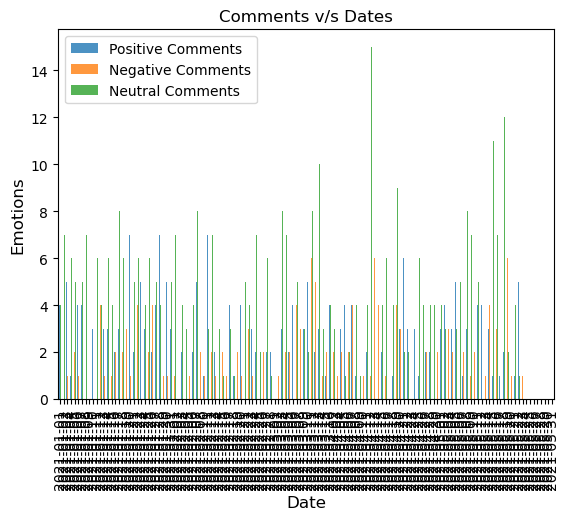

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.tight_layout()
df_new.plot(x='Date', y=['Positive Comments','Negative Comments','Neutral Comments'], alpha=0.8,kind='bar')
plt.title('Comments v/s Dates')
plt.ylabel('Emotions', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()

In [33]:
week=df_new.groupby(['Week'])[['Positive Comments','Negative Comments','Neutral Comments']].sum()
week.reset_index(inplace=True)
week

,Week,Positive Comments,Negative Comments,Neutral Comments
0,1,24,6,38
1,2,15,11,32
2,3,22,13,42
3,4,27,15,38
4,5,18,5,39
5,6,15,7,27
6,7,18,9,24
7,8,18,8,28
8,9,14,13,36
9,10,17,23,33


In [42]:
week.to_csv('weeks.csv',index=False)

<Figure size 1000x500 with 0 Axes>

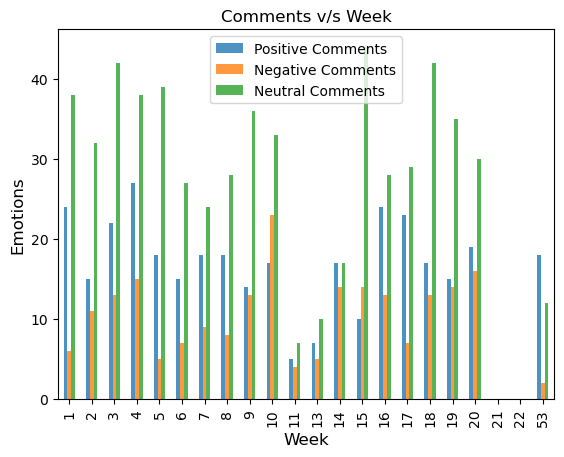

In [34]:
plt.figure(figsize=(10,5))
plt.tight_layout()
week.plot(x='Week', y=['Positive Comments','Negative Comments','Neutral Comments'], alpha=0.8,kind='bar')
plt.title('Comments v/s Week')
plt.ylabel('Emotions', fontsize=12)
plt.xlabel('Week', fontsize=12)
plt.show()

In [35]:
month=df_new.groupby(['Month'])[['Positive Comments','Negative Comments','Neutral Comments']].sum()
month.reset_index(inplace=True)
month

,Month,Positive Comments,Negative Comments,Neutral Comments
0,1,106,47,162
1,2,69,29,118
2,3,36,40,76
3,4,74,51,121
4,5,58,45,114


<Figure size 1000x500 with 0 Axes>

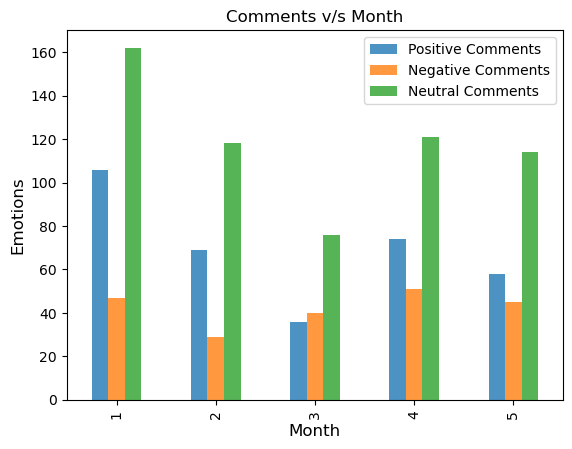

In [36]:
plt.figure(figsize=(10,5))
plt.tight_layout()
month.plot(x='Month', y=['Positive Comments','Negative Comments','Neutral Comments'], alpha=0.8,kind='bar')
plt.title('Comments v/s Month')
plt.ylabel('Emotions', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

In [37]:
all_sentences = []
for word in df_text:
    all_sentences.append(word)

In [38]:
all_sentences

['2021 Sin excusas#FitbitSENSE',
 'Upped my steps today with a lovely walk by the coast then a slippy dog walk just now. Feeling positive until I let the little voice remind me it’s back to work in 2 days. #FitbitSENSE #WalkEveryDay2021',
 'Fitbit Sense drops to lowest price yet in the January sales https://nigerianewsnetwork.com/fitbit-sense-drops-to-lowest-price-yet-in-the-january-sales/…',
 "My fitbit sense worked at first with phone calls and texts,  and then stopped I've tried everything I've seen, now it syncs but says must have an app to use this device, which I do??",
 'やっぱりfitbit senseが無難かなー。夫が隣でもうオーダーしようとしてるから慌てて止めたけど\n\nsurface  proもオーダーしたばっかだけど普段ケチケチしてるくせに1度使い出すと止まらなくなるやっかいな性格',
 'fitbit senseに不満はないのだが、ストレス測る機能がいまいちわからない。',
 'لمحبي الساعات الذكية\nعرضعلى ساعات Fitbit Sense and Versa 3\nشحن مباشر من #امازون بريطانيا\n\nhttps://amzn.to/2JGmxTy',
 'Fitbit Sense drops to lowest price yet in the January sales https://bibarud.com/fitbit-sense-drops-to-lowest-price-yet-in-the-janu

In [39]:
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['2021', 'Sin', 'excusas#FitbitSENSE', 'Upped', 'my', 'steps', 'today', 'with', 'a', 'lovely', 'walk', 'by', 'the', 'coast', 'then', 'a', 'slippy', 'dog', 'walk', 'just', 'now.', 'Feeling', 'positive', 'until', 'I', 'let', 'the', 'little', 'voice', 'remind', 'me', 'it’s', 'back', 'to', 'work', 'in', '2', 'days.', '#FitbitSENSE', '#WalkEveryDay2021', 'Fitbit', 'Sense', 'drops', 'to', 'lowest', 'price', 'yet', 'in', 'the', 'January', 'sales', 'https://nigerianewsnetwork.com/fitbit-sense-drops-to-lowest-price-yet-in-the-january-sales/…', 'My', 'fitbit', 'sense', 'worked', 'at', 'first', 'with', 'phone', 'calls', 'and', 'texts,', 'and', 'then', 'stopped', "I've", 'tried', 'everything', "I've", 'seen,', 'now', 'it', 'syncs', 'but', 'says', 'must', 'have', 'an', 'app', 'to', 'use', 'this', 'device,', 'which', 'I', 'do??', 'やっぱりfitbit', 'senseが無難かなー。夫が隣でもうオーダーしようとしてるから慌てて止めたけど', 'surface', 'proもオーダーしたばっかだけど普段ケチケチしてるくせに1度使い出すと止まらなくなるやっかいな性格', 'fitbit', 'senseに不満はないのだが、ストレス測る機能がいまいちわからない。', 'لم

### Removing Punctuation

In [40]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [41]:
lines2

['2021',
 'Sin',
 'excusasFitbitSENSE',
 'Upped',
 'my',
 'steps',
 'today',
 'with',
 'a',
 'lovely',
 'walk',
 'by',
 'the',
 'coast',
 'then',
 'a',
 'slippy',
 'dog',
 'walk',
 'just',
 'now',
 'Feeling',
 'positive',
 'until',
 'I',
 'let',
 'the',
 'little',
 'voice',
 'remind',
 'me',
 'its',
 'back',
 'to',
 'work',
 'in',
 '2',
 'days',
 'FitbitSENSE',
 'WalkEveryDay2021',
 'Fitbit',
 'Sense',
 'drops',
 'to',
 'lowest',
 'price',
 'yet',
 'in',
 'the',
 'January',
 'sales',
 'httpsnigerianewsnetworkcomfitbitsensedropstolowestpriceyetinthejanuarysales',
 'My',
 'fitbit',
 'sense',
 'worked',
 'at',
 'first',
 'with',
 'phone',
 'calls',
 'and',
 'texts',
 'and',
 'then',
 'stopped',
 'Ive',
 'tried',
 'everything',
 'Ive',
 'seen',
 'now',
 'it',
 'syncs',
 'but',
 'says',
 'must',
 'have',
 'an',
 'app',
 'to',
 'use',
 'this',
 'device',
 'which',
 'I',
 'do',
 'fitbit',
 'sense',
 'surface',
 'pro1',
 'fitbit',
 'sense',
 'Fitbit',
 'Sense',
 'and',
 'Versa',
 '3',
 'httpsa

### This is stemming the words to their root

In [216]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['2021',
 'sin',
 'excusa',
 'fitbitsens',
 'up',
 'my',
 'step',
 'today',
 'with',
 'a',
 'love',
 'walk',
 'by',
 'the',
 'coast',
 'then',
 'a',
 'slippi',
 'dog',
 'walk',
 'just',
 'now',
 'feel',
 'posit',
 'until',
 'i',
 'let',
 'the',
 'littl',
 'voic',
 'remind',
 'me',
 'it',
 'back',
 'to',
 'work',
 'in',
 '2',
 'day',
 'fitbitsens',
 'walkeveryday2021',
 'galaxi',
 'watch',
 '3',
 'garmin',
 'forerunn',
 '245',
 'fitbit',
 'sens',
 'hard',
 'to',
 'choos',
 'fitbit',
 'sens',
 'drop',
 'to',
 'lowest',
 'price',
 'yet',
 'in',
 'the',
 'januari',
 'sale',
 'httpsnigerianewsnetworkcomfitbitsensedropstolowestpriceyetinthejanuarysal',
 'oof',
 'id',
 'say',
 'the',
 'sleep',
 'track',
 'on',
 'fitbit',
 'is',
 'pretti',
 'accur',
 'i',
 'felt',
 'this',
 'this',
 'morn',
 'time',
 'to',
 'get',
 'the',
 'day',
 'start',
 'have',
 'a',
 'great',
 'day',
 'fitbit',
 'fitbitsens',
 'my',
 'fitbit',
 'sens',
 'work',
 'at',
 'first',
 'with',
 'phone',
 'call',
 'and',
 'text',

### Removing all Stop Words


In [217]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['2021',
 'sin',
 'excusa',
 'fitbitsens',
 'step',
 'today',
 'love',
 'walk',
 'coast',
 'slippi',
 'dog',
 'walk',
 'feel',
 'posit',
 'let',
 'littl',
 'voic',
 'remind',
 'work',
 '2',
 'day',
 'fitbitsens',
 'walkeveryday2021',
 'galaxi',
 'watch',
 '3',
 'garmin',
 'forerunn',
 '245',
 'fitbit',
 'sens',
 'hard',
 'choos',
 'fitbit',
 'sens',
 'drop',
 'lowest',
 'price',
 'januari',
 'sale',
 'httpsnigerianewsnetworkcomfitbitsensedropstolowestpriceyetinthejanuarysal',
 'oof',
 'id',
 'sleep',
 'track',
 'fitbit',
 'pretti',
 'accur',
 'felt',
 'morn',
 'time',
 'day',
 'start',
 'great',
 'day',
 'fitbit',
 'fitbitsens',
 'fitbit',
 'sens',
 'work',
 'phone',
 'text',
 'stop',
 'ive',
 'tri',
 'everyth',
 'ive',
 'seen',
 'sync',
 'app',
 'use',
 'devic',
 'fitbit',
 'clockfac',
 'fitfac',
 'fitbitsens',
 'analog',
 'digit',
 'httpsinstagramcompcjfccdsg1khigshid10p1wo2t80mxj',
 'fitbit',
 'sens',
 'surfac',
 'pro',
 '1',
 'fitbit',
 'sens',
 'fitbit',
 'sens',
 'cae',
 'al',
 '

In [218]:
df_cleansed = pd.DataFrame(stem2)

df_cleansed = df_cleansed[0].value_counts()


In [219]:
df_cleansed

fitbit                                                                       11
sens                                                                          8
fitbitsens                                                                    4
drop                                                                          3
lowest                                                                        3
sale                                                                          3
day                                                                           3
price                                                                         3
januari                                                                       3
work                                                                          2
de                                                                            2
ive                                                                           2
walk                                    

In [220]:
# df=df[1:] # removing the first word friquency

### This will give frequencies of our words


In [221]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({'UserScreenName': 1, 'UserName': 1, 'Timestamp': 1, 'Text': 1, 'Embedded_text': 1, 'Emojis': 1, 'Comments': 1, 'Likes': 1, 'Retweets': 1, 'Image link': 1, ...})

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

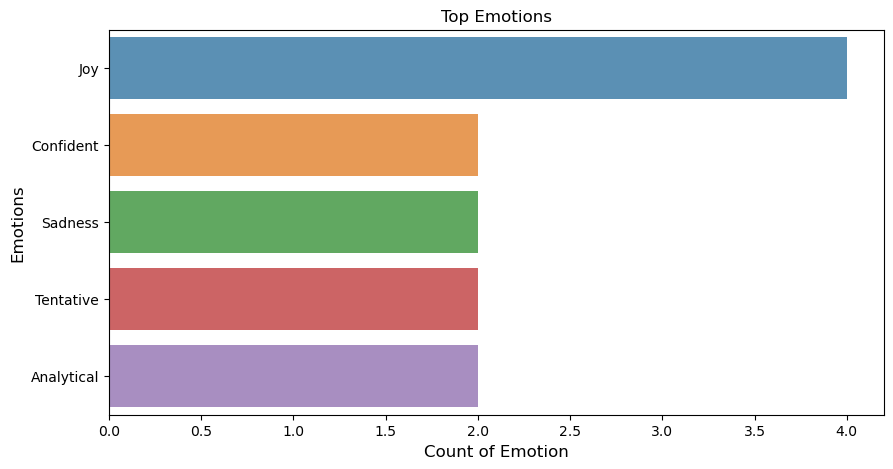

In [223]:
#This is a simple plot that shows the top 30 words being used

df_emotion = pd.DataFrame(list_Emotion)[0].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(df_emotion.values, df_emotion.index, alpha=0.8)
plt.title('Top Emotions')
plt.ylabel('Emotions', fontsize=12)
plt.xlabel('Count of Emotion', fontsize=12)
plt.show()

In [224]:
df_cleansed.sum()

114

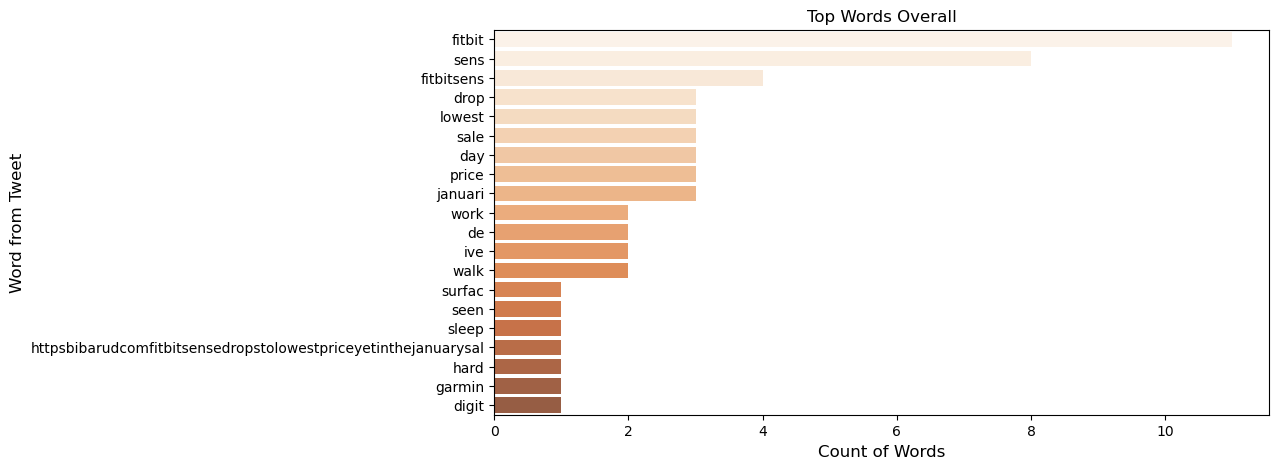

In [225]:
#This is a simple plot that shows the top 30 words being used
#df.plot(30)

df_plot = df_cleansed[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_plot.values, df_plot.index, alpha=0.8, palette=("Oranges"))
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [226]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


In [227]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [228]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


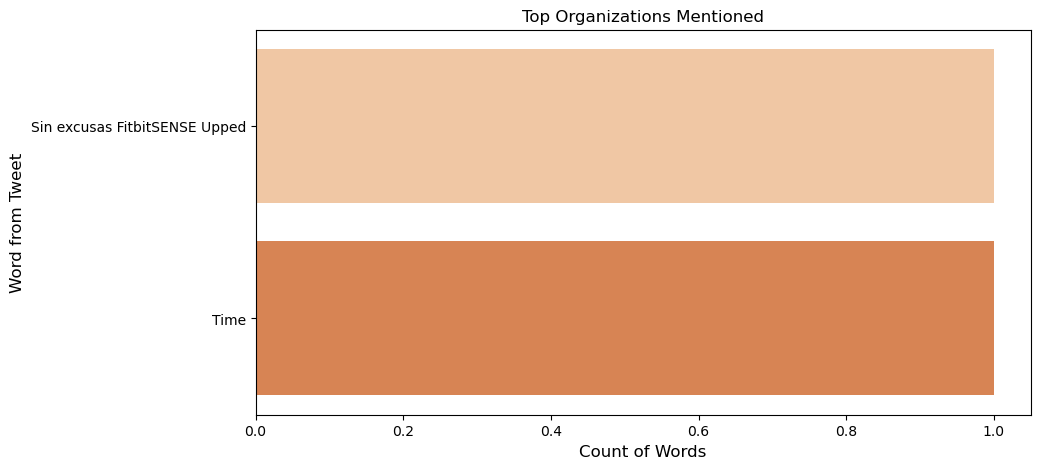

In [229]:
df_plot = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_plot.values, df_plot.index, alpha=0.8, palette=("Oranges"))
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [230]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()
